## Calculate Pwf from CTU pumping Pressure

### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
This project understands how the pressure gauges measurements could be correlated to the pumping pressure, depth and pumping rate.

### 2) Data Collection
Dataset Source - Merged gauge data and CTU CSV files from the wells Bed 16 C7-1, Bed 16 C6-4, Bed 15-23 and Bed 16-24
The data consists of 4 column and 5700 rows.

#### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [26]:
df = pd.read_csv('data/pwf.csv')

Show Top 5 Records

In [5]:
df.head()

,ct_depth,ct_pressure,n2_rate,p_gauge
0,2522.338867,1697.630100,406.954765,648.4946
1,2577.064697,1694.699002,406.954765,665.6422
2,2631.514648,1688.836155,372.128820,682.4472
3,2686.221680,1682.973416,406.954765,699.8019
4,2740.712646,1677.110569,372.128820,717.7613


Shape of the dataset/

In [6]:
df.shape

(5703, 4)

### 2.2 Dataset information
- ct_depth: the depth of the coiled tubing inside the wellbore (ft).
- ct_pressure: the pumping pressure of the CTU measured from the surface while pumping N2 (psi).
- n2_rate: the pumping rate of N2 (scf/min).
- p_gauge: the pressure measured by the gauges attached with CTU end (psi).

### 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set

#### 3.1 Check Missing values

In [7]:
df.isna().sum()

ct_depth       0
ct_pressure    0
n2_rate        0
p_gauge        0
dtype: int64

There are no missing values in the data set

#### 3.2 Check Duplicates

In [8]:
df.duplicated().sum()

0

There are no duplicates values in the data set

#### 3.3 Check Datatypes

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703 entries, 0 to 5702
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ct_depth     5703 non-null   float64
 1   ct_pressure  5703 non-null   float64
 2   n2_rate      5703 non-null   float64
 3   p_gauge      5703 non-null   float64
dtypes: float64(4)
memory usage: 178.3 KB


#### 3.4 Checking the number of unique values of each column

In [10]:
df.nunique()

ct_depth       1533
ct_pressure    1575
n2_rate          38
p_gauge        5694
dtype: int64

#### 3.5 Check statistics of data set

In [11]:
df.describe()

,ct_depth,ct_pressure,n2_rate,p_gauge
count,5703.000000,5703.000000,5703.000000,5703.000000
mean,11064.407512,2330.676665,411.907833,2941.829447
std,2196.268207,543.887856,98.749882,816.208175
min,41.021999,0.000000,0.000000,31.142000
25%,11402.881350,2088.783745,372.128820,2679.422700
50%,11621.546880,2607.319010,406.954765,3330.117600
75%,11655.128910,2652.266493,417.128649,3379.206950
max,12942.510740,3810.141059,5075.195618,4489.460800


Insight
- From above description of numerical data, there is ~600 psi difference between gauge data and pumping pressure data.
- Standarad deviation is quite high in the CTU depth due to the removed data while RIH.
- Maximum value of n2_rate is 5075 scf/min. it will be of non use in our analysis.

#### 3.7 Exploring Data

In [12]:
df.head()

,ct_depth,ct_pressure,n2_rate,p_gauge
0,2522.338867,1697.630100,406.954765,648.4946
1,2577.064697,1694.699002,406.954765,665.6422
2,2631.514648,1688.836155,372.128820,682.4472
3,2686.221680,1682.973416,406.954765,699.8019
4,2740.712646,1677.110569,372.128820,717.7613


In [ ]:
#print("Categories in 'gender' variable:     ",end=" " )
#print(df['gender'].unique())

#print("Categories in 'race_ethnicity' variable:  ",end=" ")
#print(df['race_ethnicity'].unique())

#print("Categories in'parental level of education' variable:",end=" " )
#print(df['parental_level_of_education'].unique())

#print("Categories in 'lunch' variable:     ",end=" " )
#print(df['lunch'].unique())

#print("Categories in 'test preparation course' variable:     ",end=" " )
#print(df['test_preparation_course'].unique())

In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['ct_depth', 'ct_pressure', 'n2_rate', 'p_gauge']

We have 0 categorical features : []


In [16]:
CTU_shallower_than_10000 = df[df['ct_depth'] <= 10000].count()
pp_0 = df[df['ct_pressure'] == 0].count()
pg_0 = df[df['p_gauge'] == 0].count()

print(f'Number of measured values while CTU shallower than 10000 ft: {CTU_shallower_than_10000}')
print(f'Number of measured zero pressure on CTU: {pp_0}')
print(f'Number of measured zero pressure on gauge: {pg_0}')

Number of measured values while CTU shallower than 10000 ft: ct_depth       554
ct_pressure    554
n2_rate        554
p_gauge        554
dtype: int64
Number of measured zero pressure on CTU: ct_depth       2
ct_pressure    2
n2_rate        2
p_gauge        2
dtype: int64
Number of measured zero pressure on gauge: ct_depth       0
ct_pressure    0
n2_rate        0
p_gauge        0
dtype: int64


### 4. Exploring Data ( Visualization )

#### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

4.1.1 Histogram & KDE

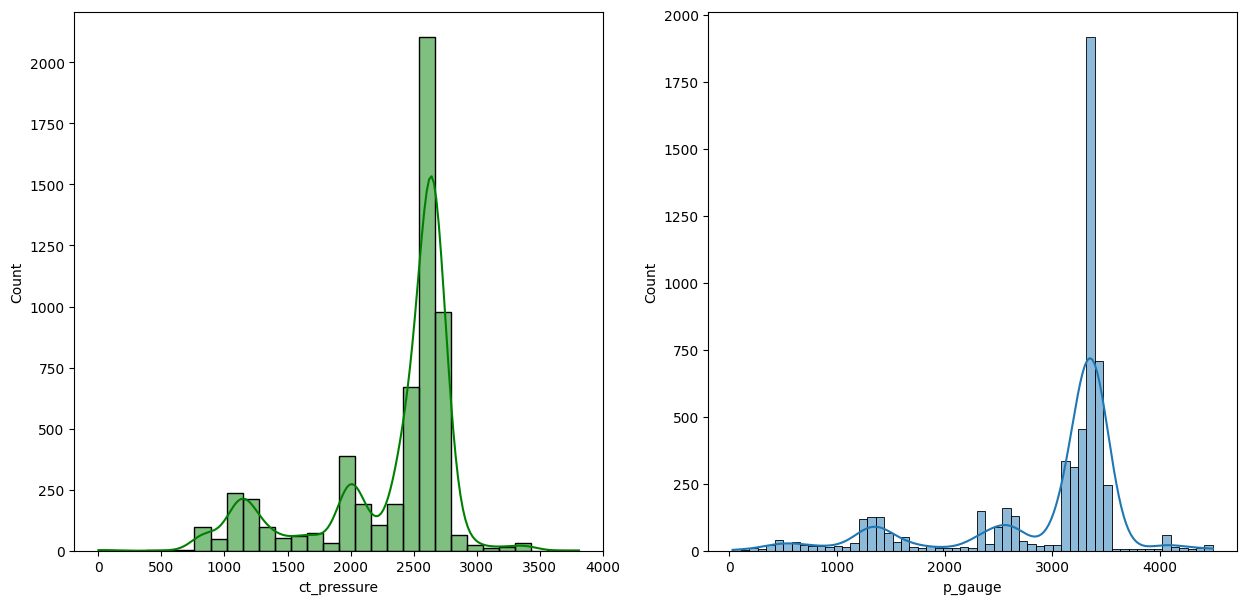

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='ct_pressure',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='p_gauge',kde=True)
plt.show()

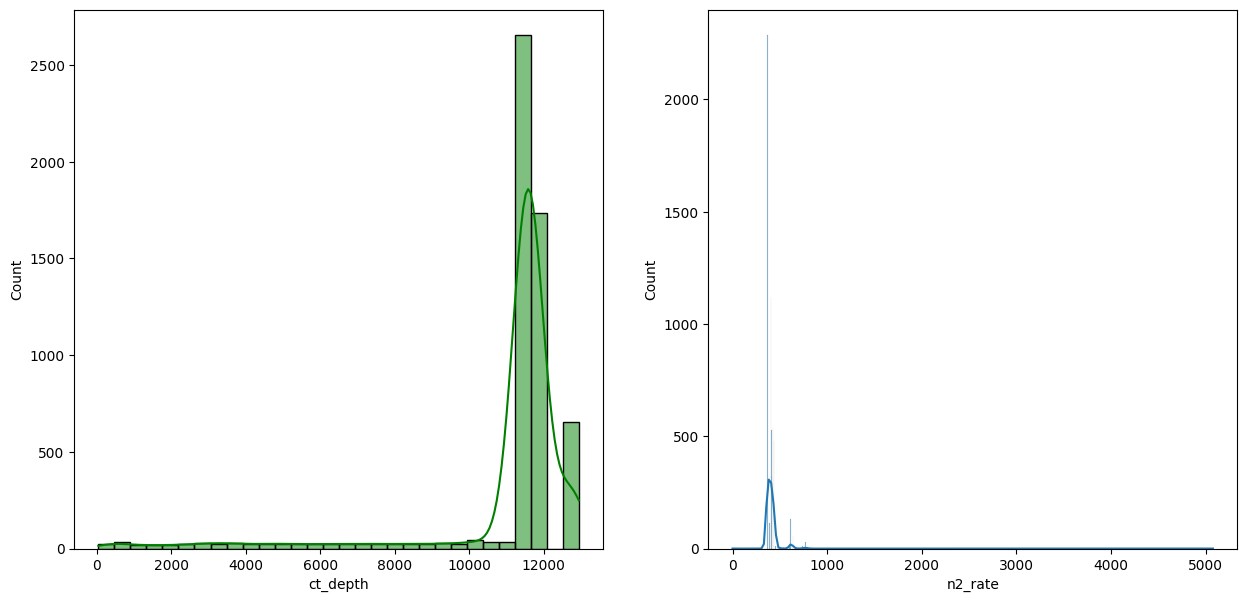

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='ct_depth',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='n2_rate',kde=True)
plt.show()

##### Insights
- There are outliers in the N2 pumping rate.
- Also we shall remove the data with CTU depth shallower thatn 10000 ft.

In [29]:
df.drop(df[df['n2_rate'] > 1000].index, inplace=True)
df.drop(df[df['ct_depth'] < 10000].index, inplace=True)

#### 4.2 Maximumum values of the given data

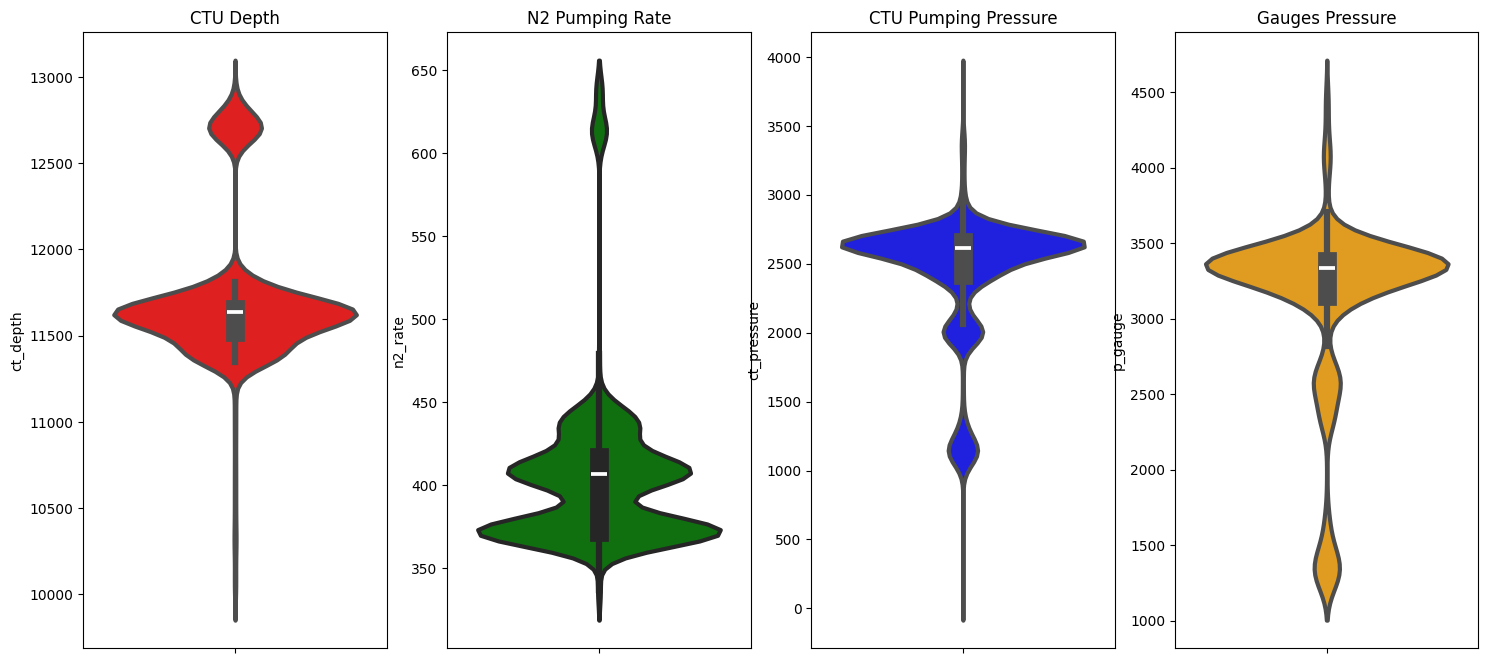

In [30]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('CTU Depth')
sns.violinplot(y='ct_depth',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('N2 Pumping Rate')
sns.violinplot(y='n2_rate',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('CTU Pumping Pressure')
sns.violinplot(y='ct_pressure',data=df,color='blue',linewidth=3)
plt.subplot(1, 4, 4)
plt.title('Gauges Pressure')
sns.violinplot(y='p_gauge',data=df,color='orange',linewidth=3)
plt.show()

##### Insights
- From the above four plots, there is clear correlation between pumping pressure and gauge pressure.

### 4.3 Checking outliers

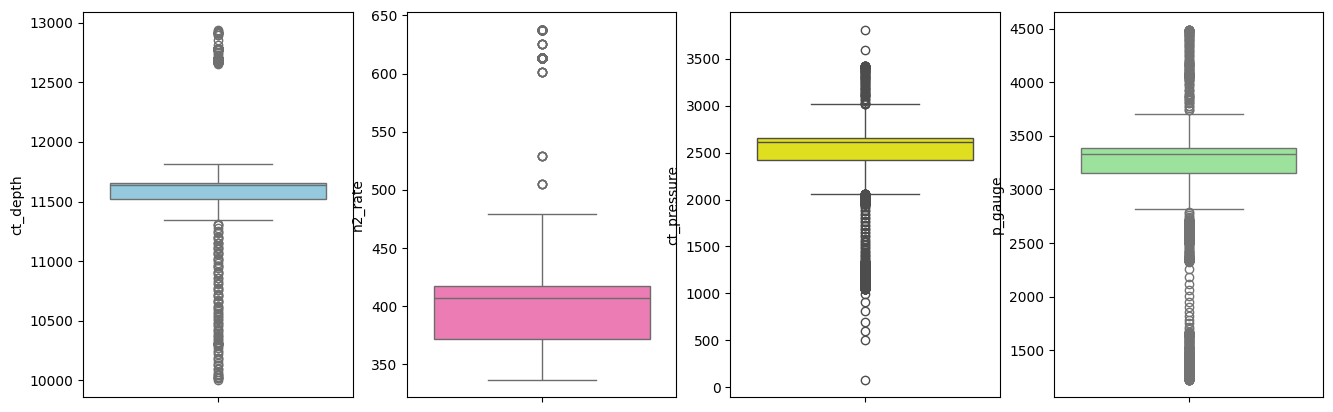

In [31]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['ct_depth'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['n2_rate'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['ct_pressure'],color='yellow')
plt.subplot(144)
sns.boxplot(df['p_gauge'],color='lightgreen')
plt.show()

4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

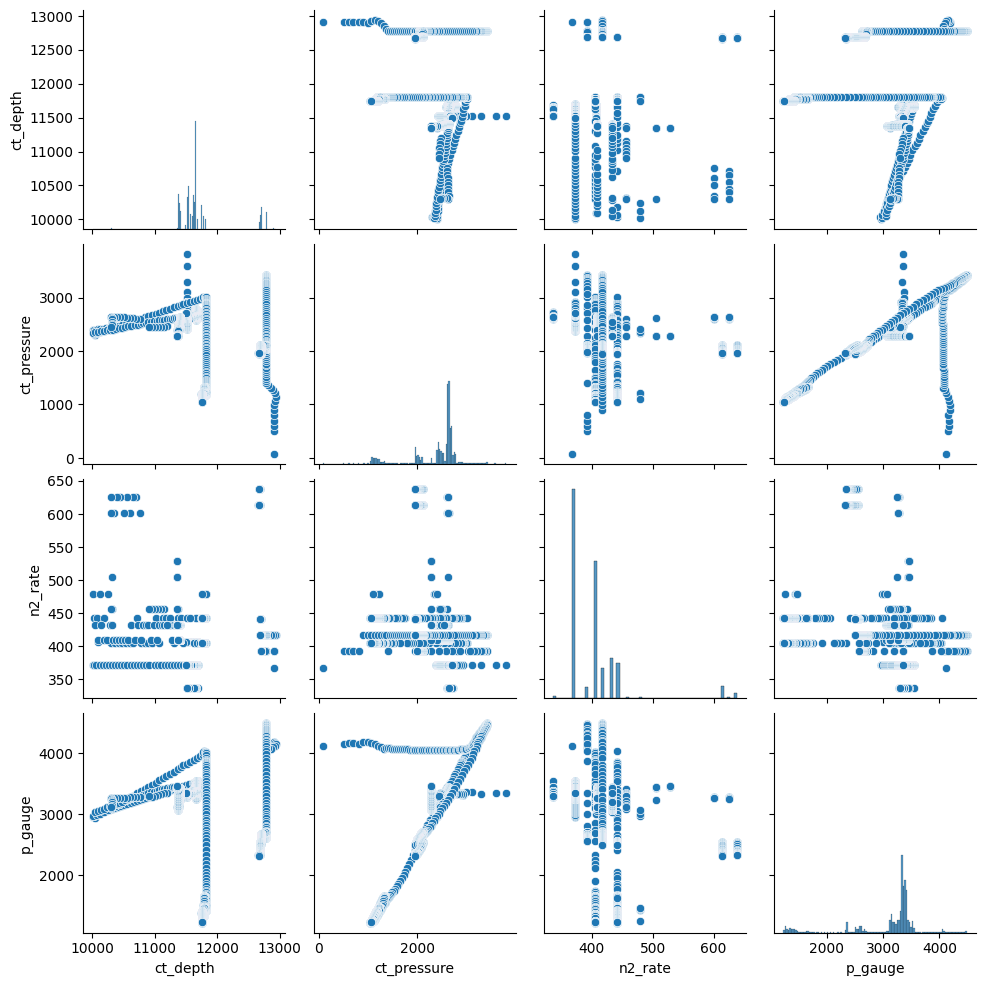

In [32]:
sns.pairplot(df)
plt.show()